# 環境設定

In [ ]:
# Dataset Download
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

# Unzip the file
import os
import zipfile

zip_file = zipfile.ZipFile('cats_and_dogs_filtered.zip', 'r')
zip_file.extractall()
zip_file.close()

--2023-11-14 05:42:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.101.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   195MB/s    in 0.3s    

2023-11-14 05:42:12 (195 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Install HappyML
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

In [ ]:
# Dataset Path Setting
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

# 照片前處理

In [ ]:
# Generate Training / Validation Set
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255, # 縮放至0~1
    validation_split=0.25, # 切分驗證集
    shear_range=10, # 資料集擴張 - 隨機切變
    zoom_range=0.2, # 資料集擴張 - 隨機縮放
    horizontal_flip=True) # 資料集擴張 - 隨機翻轉

train_set = train_datagen.flow_from_directory(
    directory=train_dir, # 資料集的路徑來源
    target_size=(64, 64), # 統一縮放
    batch_size=10, # 每次轉換10張照片
    class_mode="binary", # 二元分類
    subset="training") # 將此批命名為'training'

val_set = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    batch_size=10,
    class_mode="binary",
    subset="validation")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Generate Testing Set
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_set = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=10,
    class_mode="binary")

Found 1000 images belonging to 2 classes.


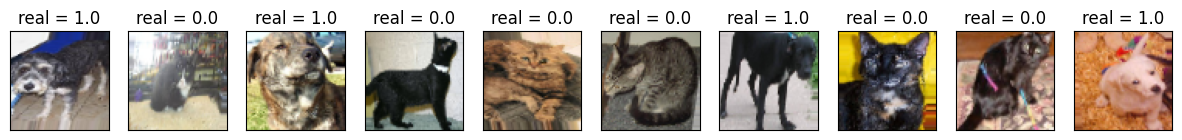

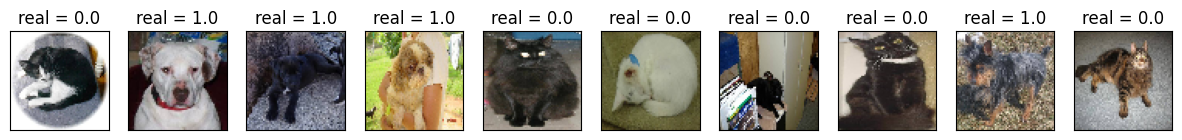

In [ ]:
# Validate the Success of Image Loading
import HappyML.model_drawer as md

# Print the first 10 images of Training Set
for data, label in train_set:
    md.show_first_n_images(x_ary=data, y_real=label, first_n=10, font_size=12)
    break

# Print the first 10 images of Testing Set
for data, label in test_set:
    md.show_first_n_images(x_ary=data, y_real=label, first_n=10, font_size=12)
    break

# 建造卷積神經網路

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# CNN Model
model = Sequential()

# Input & 1st Hidden Layer: Convolutional + Max Pooling
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=[64, 64, 3]))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))

# 2nd Hidden Layer: Convolutional + Max Pooling
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))

# 3rd Hidden Layer: Convolutional + Max Pooling
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))

# Flatten layer
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(units=512, activation="relu"))

# Output layer
model.add(layers.Dense(units=1, activation="sigmoid"))

# Compile
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# 模型校正

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Create TensorBoard log directory
import os
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard

logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

In [ ]:
# Start the TensorBoard
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

In [ ]:
# Training Model
model.fit(train_set, validation_data=val_set, batch_size=10, epochs=25, callbacks=[tensorboard_callback])

Epoch 1/25
150/150 [==============================] - 21s 47ms/step - loss: 0.7136 - accuracy: 0.4987 - val_loss: 0.6902 - val_accuracy: 0.5100
Epoch 2/25
150/150 [==============================] - 7s 50ms/step - loss: 0.6894 - accuracy: 0.5153 - val_loss: 0.6825 - val_accuracy: 0.5320
Epoch 3/25
150/150 [==============================] - 8s 52ms/step - loss: 0.6895 - accuracy: 0.5287 - val_loss: 0.6919 - val_accuracy: 0.5240
Epoch 4/25
150/150 [==============================] - 7s 44ms/step - loss: 0.6933 - accuracy: 0.5140 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 5/25
150/150 [==============================] - 8s 52ms/step - loss: 0.6885 - accuracy: 0.5500 - val_loss: 0.6844 - val_accuracy: 0.5440
Epoch 6/25
150/150 [==============================] - 7s 49ms/step - loss: 0.6840 - accuracy: 0.5533 - val_loss: 0.6804 - val_accuracy: 0.5820
Epoch 7/25
150/150 [==============================] - 8s 52ms/step - loss: 0.6802 - accuracy: 0.5693 - val_loss: 0.6606 - val_accuracy: 0.596

# 模型訓練

In [ ]:
# Model Training (After Tuning)
model.fit(train_set, validation_data=val_set, batch_size=10, epochs=8)

Epoch 1/8
150/150 [==============================] - 9s 43ms/step - loss: 0.7032 - accuracy: 0.4900 - val_loss: 0.6929 - val_accuracy: 0.5140
Epoch 2/8
150/150 [==============================] - 7s 49ms/step - loss: 0.6935 - accuracy: 0.4940 - val_loss: 0.6930 - val_accuracy: 0.5060
Epoch 3/8
150/150 [==============================] - 6s 38ms/step - loss: 0.6901 - accuracy: 0.4980 - val_loss: 0.6904 - val_accuracy: 0.5140
Epoch 4/8
150/150 [==============================] - 7s 46ms/step - loss: 0.6940 - accuracy: 0.4967 - val_loss: 0.6928 - val_accuracy: 0.5140
Epoch 5/8
150/150 [==============================] - 6s 40ms/step - loss: 0.6922 - accuracy: 0.5093 - val_loss: 0.6919 - val_accuracy: 0.5200
Epoch 6/8
150/150 [==============================] - 7s 49ms/step - loss: 0.6869 - accuracy: 0.5333 - val_loss: 0.7083 - val_accuracy: 0.5000
Epoch 7/8
150/150 [==============================] - 6s 37ms/step - loss: 0.6828 - accuracy: 0.5473 - val_loss: 0.6901 - val_accuracy: 0.5300
Epoch 

# 模型預測

100/100 [==============================] - 2s 15ms/step


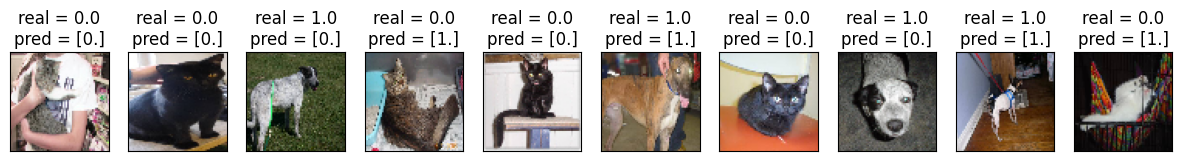

In [ ]:
import numpy as np

Y_pred = np.rint(model.predict(test_set))

for data, label in test_set:
    md.show_first_n_images(x_ary=data, y_real=label, y_pred=Y_pred[:10], first_n=10, font_size=12)
    break

# 模型評估

In [ ]:
test_loss, test_acc = model.evaluate(test_set)
print("Loss of Test:", test_loss)
print("Accuracy of Test:", test_acc)

100/100 [==============================] - 2s 19ms/step - loss: 0.6657 - accuracy: 0.6910
Loss of Test: 0.6656625270843506
Accuracy of Test: 0.6909999847412109


# 使用者照片預測

1/1 [==============================] - 0s 27ms/step
Cat


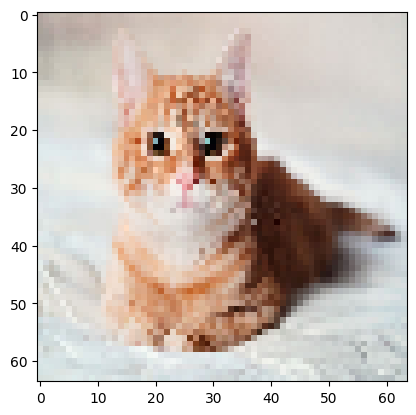

In [ ]:
from tensorflow.keras.preprocessing import image

user_image = image.load_img("cats_and_dogs_filtered/user/cat_or_dog_001.jpg", target_size=(64, 64))
image_data = image.img_to_array(user_image) / 255
image_data = np.expand_dims(image_data, axis=0)

isDog = (model.predict(image_data) >= 0.5)
print("Dog" if isDog[0][0] else "Cat")

import matplotlib.pyplot as plt
plt.imshow(user_image)
plt.show()
